In [184]:
import pandas as pd # подключим библиотеку
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(url)

print(df)

    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          2      442
20       21  

In [185]:
df.shape

(41, 5)

In [186]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [188]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [189]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [190]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [191]:
print(df[(df['age']>100)])

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [192]:
print(df[(df['purchases'] < 0) | (df['revenue'] < 0)])

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [193]:
print(df[((df['purchases'] == 0) & (df['revenue'] != 0)) | ((df['purchases'] > 0) & (df['revenue'] == 0))])

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [194]:
dups = df[df.duplicated(keep=False)]
print(dups)

    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


Проблемы качества данных выражены в логических несостыковках таких как:
У покупателя с id = 6 отрицательное количество покупок
У покупателя с id = 11 4 покупки и при этом нулевой доход с них
Наличие дублирующей строки

In [195]:
df.value_counts('country')

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [196]:
df.value_counts('age')

age
24.0     5
35.0     2
39.0     2
52.0     2
47.0     2
28.0     2
31.0     2
32.0     2
57.0     1
55.0     1
54.0     1
51.0     1
46.0     1
45.0     1
43.0     1
42.0     1
5.0      1
36.0     1
18.0     1
34.0     1
33.0     1
26.0     1
25.0     1
23.0     1
22.0     1
21.0     1
20.0     1
120.0    1
Name: count, dtype: int64

In [197]:
group=df.groupby('country')
group.size() # считаем количество строк, оказавшихся в каждой группе

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [198]:
group['revenue'].median()

country
CN    1054.0
DE    1200.0
FR     619.5
RU     650.0
US     537.5
Name: revenue, dtype: float64

In [199]:
df['revenue'].median()

np.float64(693.0)

In [200]:
group['revenue'].sum()

country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64

In [201]:
a = df.groupby('country').agg(customers =('country', 'count'), purchases=('purchases', 'sum'), revenue=('revenue', 'mean'))
a

,customers,purchases,revenue
country,,,
CN,2,9,1054.000000
DE,6,39,1445.500000
FR,12,51,675.916667
RU,13,62,790.076923
US,8,37,557.375000


Основные наблюдения:
Больше всего покупателей в России, наименьшее количество в Китае
При небольшом количестве покупателей из Германии с их покупок наибольший доход

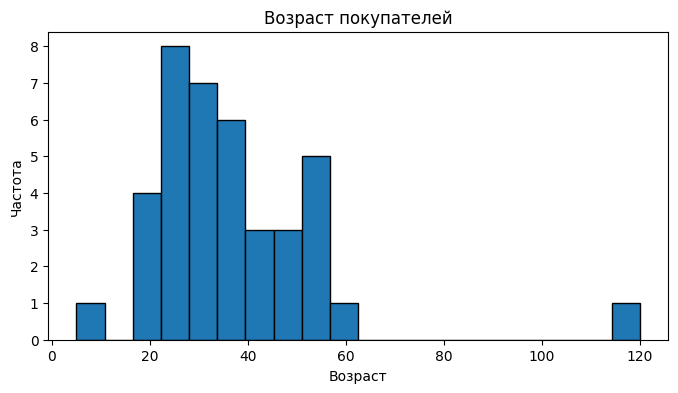

In [207]:
fig, ax = plt.subplots(figsize=(8, 4)) # размер полотна

ax.hist( # строим график - гистограмму
    df['age'], bins=20,edgecolor ='black')
ax.set_title('Возраст покупателей') # название графика
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.savefig("figures/hist.png", dpi=150, bbox_inches='tight')
plt.show() # отображаем полотна


На графике показана частота совершения покупок пользователями в зависимости от их возраста, таким образом можно заметить что чаще всего покупки совершают люди в возрасте от 20 до 40 лет

<Figure size 800x400 with 0 Axes>

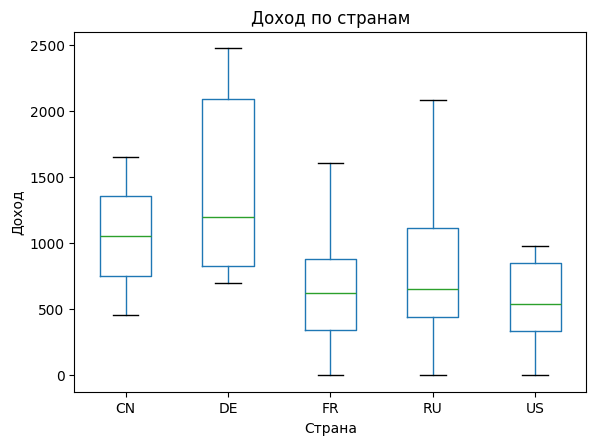

In [209]:
plt.figure(figsize=(8, 4))
df.boxplot(column='revenue', by='country', grid=False)
plt.title('Доход по странам')
plt.suptitle('') 
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.savefig("figures/boxplot.png", dpi=150, bbox_inches='tight')
plt.show()


Из графика можно заметить что наибольший доход был получен с Германии, а наимненьший с США

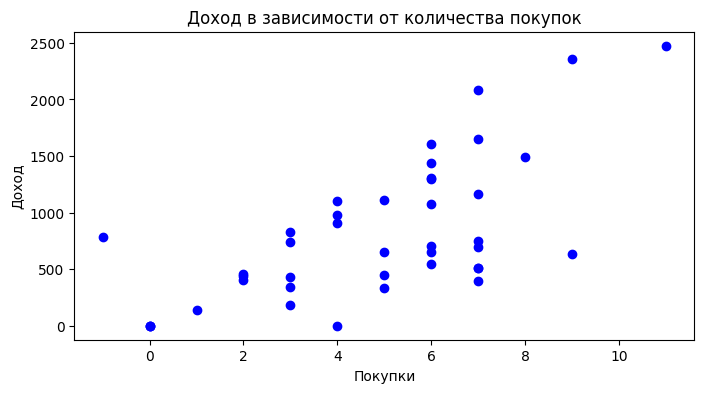

In [208]:
plt.figure(figsize=(8, 4))
plt.scatter(df['purchases'], df['revenue'], c='blue')
plt.title('Доход в зависимости от количества покупок')
plt.xlabel('Покупки')
plt.ylabel('Доход')
plt.savefig("figures/scatter.png", dpi=150, bbox_inches='tight')
plt.show()


На графике отображается количество совершенных покупок пользователем и доход полученных от них. Можно заметить что при наибольшем количестве покупок - наибольший доход. Также на графике видна логическая ошибка в данных таблицы - наличие дохода при отрицательном количестве покупок.